# TED talks views prediction 

### Идея

Първоначалната ми идея беше да направя модел, който предсказва брой гледания на youtube клипове, но още от пръв поглед върху kernel-ите на dataset-a за trending youtube videos, ставаше ясно, че почти всички видеа са музикални клипове и трейлъри на филми. Тоест доста специфична извадка от всички youtube клипове. За това прецених, че [този](https://www.kaggle.com/rounakbanik/ted-talks) dataset за **TED talks** е представителна извадка и би бил по-добър за основа на модел.

Целта ми е да:
* разгледам данните
* да открия кои feature-и допринасят най-много за броя гледания на TED talks
* да натренирам регресионен модел с възможно най-висок процент успеваемост в отговарянето на въпроса: **Колко гледания би имал евентуален TED talk?**


Нека първо import-нем библиотеки, които ще ни трябват и заредим данните.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
import sklearn

from IPython.display import display

%matplotlib inline

In [82]:
data = pd.read_csv('data/ted-talks/ted_main.csv')
data

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

In [83]:
data.shape

(2550, 17)

Окей, имаме *2550* talk-a и *17* feature-а. Нека ги разгледаме по-подробно и видим какво представлява всеки от тях.

In [84]:
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

Според описанието в kaggle:

* **comments** - The number of first level comments made on the talk
* **description** - A blurb of what the talk is about
* **duration** - The duration of the talk in seconds
* **event** - The TED/TEDx event where the talk took place
* **film_date** - The Unix timestamp of the filming
* **languages** - The number of languages in which the talk is available
* **main_speaker** - The first named speaker of the talk
* **name** - The official name of the TED Talk. Includes the title and the speaker.
* **num_speaker** - The number of speakers in the talk
* **published_date** - The Unix timestamp for the publication of the talk on TED.com
* **ratings** - A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
* **related_talks** - A list of dictionaries of recommended talks to watch next
* **speaker_occupation** - The occupation of the main speaker
* **tags** - The themes associated with the talk
* **title** - The title of the talk
* **url** - The URL of the talk
* **views** - The number of views on the talk

In [85]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Views

От първоначален поглед върху dataset-a можем да заключим, че нашият label ще е последната колона **views**. Това е непрекъсната стойност, тоест с регресия ще се опитаме да предвидим нейната стойност. Нека видим какво разпределение имат данните.

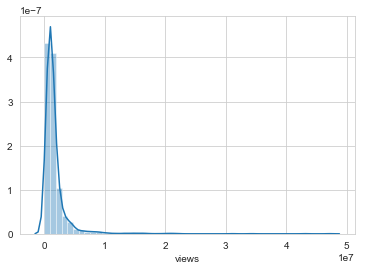

In [86]:
sns.distplot(data.views);

Очевидно данните ни са далеч от нормалното разпределение. Нека разгледаме рейнджа на гледанията.

In [115]:
data['views'].min()

50443

In [116]:
data['views'].max()

47227110

Клипът с най-малко гледания има *50 443*, а този с най-много *47 227 110*. Нека видим колко броя клипове имат гледания в рейнджове от 0 до 50 000 000 през 50 000.

In [114]:
data['views'].groupby(pd.cut(data['views'], np.arange(0, 50000000, 500000))).count()

views
(0, 500000]             277
(500000, 1000000]       768
(1000000, 1500000]      698
(1500000, 2000000]      303
(2000000, 2500000]      156
(2500000, 3000000]       82
(3000000, 3500000]       55
(3500000, 4000000]       38
(4000000, 4500000]       34
(4500000, 5000000]       34
(5000000, 5500000]        9
(5500000, 6000000]        7
(6000000, 6500000]       10
(6500000, 7000000]        6
(7000000, 7500000]        9
(7500000, 8000000]        5
(8000000, 8500000]        6
(8500000, 9000000]        6
(9000000, 9500000]        5
(9500000, 10000000]       2
(10000000, 10500000]      3
(10500000, 11000000]      3
(11000000, 11500000]      1
(11500000, 12000000]      0
(12000000, 12500000]      2
(12500000, 13000000]      0
(13000000, 13500000]      3
(13500000, 14000000]      1
(14000000, 14500000]      0
(14500000, 15000000]      3
                       ... 
(34500000, 35000000]      0
(35000000, 35500000]      0
(35500000, 36000000]      0
(36000000, 36500000]      0
(36500000, 370

Прецених, че тъй като имаме само няколко клипове с над 5 милиона гледания, бих могла да ги считам за outlier-и и да ги премахна от dataset-a. 

In [89]:
#data = data[data.views < 5000000]

Това обаче резултира в намаляване на score-a на baseline модела по-надолу в notebook-a от 0,37 (което и без друго беше супер ниско) на 0,35.

Може би клиповете с много милиони гледания, макар и много малко на брой, носят ценна информация за модела и за това реших, че не трябва да ги махам, а да пробвам друг подход за нормализиране на данните. Като например да ги прекарам през логаритъм.

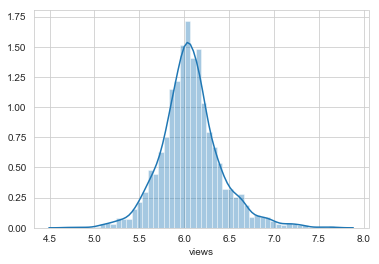

In [87]:
sns.distplot(pd.np.log10(data.views));

Така дистрибуцията е значително по-стандартна. 

## Dates

Друго наблюдение е че в dataset-a има 2 колони, които представляват дати - **film_date** и **published_date**. Може да ги конвертираме от UNIX формат до нещо по-разбирамо и human readable.

In [92]:
import datetime

data['film_date'] = data['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
data['published_date'] = data['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

data[['film_date','published_date']].head()

,film_date,published_date
0,25-02-2006,27-06-2006
1,25-02-2006,27-06-2006
2,24-02-2006,27-06-2006
3,26-02-2006,27-06-2006
4,22-02-2006,27-06-2006


За мен има логика по-отдавна качените клипове да имат повече гледания. За това като информация мисля да направя колони, репрезентиращи само годината от датите - *film_year* и *published_year*.

In [137]:
data['film_year'] = data['film_date'].str[6:].astype(np.int64)
data['published_year'] = data['published_date'].str[6:].astype(np.int64)

data[['film_year','published_year']].head()

,film_year,published_year
0,2006,2006
1,2006,2006
2,2006,2006
3,2006,2006
4,2006,2006


## Useless columns

Също така може да забележим, че **name** колоната = **main_speaker** + **title**, тоест не носи допълнителна информация и за това просто ще я махна.

Url-то и related_talks също не мисля, че са ми полезни като информация, за това и тази колона се присъединява към заминаващите си.

In [93]:
data = data.drop(['name', 'url', 'related_talks'], axis=1)

## Null values

Нека проверим дали има *null* стойности някъде в dataset-a.

In [94]:
data.isnull().sum().sort_values()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
num_speaker           0
published_date        0
ratings               0
related_talks         0
tags                  0
title                 0
views                 0
speaker_occupation    6
dtype: int64

Според резултата имаме null стойности само в една колона и само на 6 места. Имаме 2550 наблюдения, така че спокойно можем да махнем тези редове без да се притесняваме, че ще изгубим голяма част от ценните си данни.

In [95]:
data = data.dropna()
data.shape

(2544, 15)

## Number of speakers

In [98]:
data['num_speaker'].value_counts()

1    2486
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

Виждаме, че 2486 от останалите 2544 talk-a са проведени от 1 човек и общо 58 са били с повече от 1 говорител. Можем да  преобразуваме тази колона да съдържа информация единствено дали talk-a е проведен от 1 или повече говорители.

In [99]:
data['single_speaker'] = (data.num_speaker == 1).astype(np.int64)

data = data.drop('num_speaker', axis=1)

In [148]:
data.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'published_date', 'speaker_occupation',
       'tags', 'title', 'views', 'single_speaker', 'possitive_rating_percent',
       'negative_rating_percent', 'film_year', 'published_year'],
      dtype='object')

## Ratings

Колоната **ratings** представлява *json* обект, съдържащ рейтинга на talk-a според определени категории. Информацията трябва да бъде преобразувана.

In [101]:
data['ratings'].head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [102]:
data['ratings'] = data['ratings'].str.replace("'",'"')
pd.read_json(data['ratings'].iloc[1])[['name','count']]

,name,count
0,Funny,544
1,Courageous,139
2,Confusing,62
3,Beautiful,58
4,Unconvincing,258
5,Longwinded,113
6,Informative,443
7,Inspiring,413
8,Fascinating,132
9,Ingenious,56


Можем да видим, че всеки talk е оценен спрямо следните 14 категории - **Funny, Courageous, Confusing, Beautiful, Unconvincing, Longwinded,	Informative, Inspiring, Fascinating, Ingenious, Persuasive, Jaw-dropping, Obnoxious, OK**.

От тях можем да определим като позитивни следните 9 - **Funny, Courageous, Beautiful, Informative, Inspiring, Fascinating, Ingenious, Persuasive, Jaw-dropping**, като негативни тези 4 - **Confusing, Unconvincing, Longwinded, Obnoxious**, и като неутрална само 1 - **OK**.

Имаме няколко варианта:
1. Може да добавим 1 колона, която държи само дали има повече позитивни рейтинги от негативните.
2. Можем да направим 3 колони, в които да държим процента на позитивни, негативни и неутрални рейтинги спрямо броя на всички.
3. Може да добавим 14 колони, в които да държим процента на всяка една от категориите на рейтингите.

За момента като среден вариант бих избрала №2.


In [103]:
import warnings
warnings.filterwarnings("ignore")  

# създаване на новите колони
data['possitive_rating_percent'] = 0.0
data['negative_rating_percent'] = 0.0
data['neutral_rating_percent'] = 0.0

possitive_types = ['Funny', 'Beautiful', 'Courageous', 'Informative', 'Inspiring', 'Fascinating', 'Ingenious', 'Persuasive', 'Jaw-dropping']
negative_types = ['Confusing', 'Unconvincing', 'Longwinded', 'Obnoxious']

for i in range(2543):
    row = pd.read_json(data['ratings'].iloc[i])
    ratings_count = row['count'].sum() # намиране на броя на всички рейтинги
    
    possitive_count = 0
    for type in possitive_types:
        possitive_count += row[row['name'] == type]['count'].item() # намиране на броя на всички позитивни рейтинги
    
    # намиране на процента на всички позитивни рейтинги
    possitive_percent = possitive_count * 100 / ratings_count
    
    negative_count = 0
    for type in negative_types:
        negative_count += row[row['name'] == type]['count'].item() # намиране на броя на всички негативни рейтинги

    # намиране на процента на всички негативни рейтинги
    negative_percent = negative_count * 100 / ratings_count
        
    ok_count = row[row['name'] == 'OK']['count'].item() # намиране на броя на всички неутрални рейтинги
    
    # намиране на процента на всички неутрални рейтинги
    neutral_percent = ok_count * 100 / ratings_count
    
    data['possitive_rating_percent'][i] = possitive_percent
    data['negative_rating_percent'][i] = negative_percent
    data['neutral_rating_percent'][i] = neutral_percent
    
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,single_speaker,possitive_rating_percent,negative_rating_percent,neutral_rating_percent
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,25-02-2006,60,Ken Robinson,27-06-2006,"[{""id"": 7, ""name"": ""Funny"", ""count"": 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,True,97.536494,1.212573,1.250932
1,265,With the same humor and humanity he exuded in ...,977,TED2006,25-02-2006,43,Al Gore,27-06-2006,"[{""id"": 7, ""name"": ""Funny"", ""count"": 544}, {""i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,True,73.876022,19.209809,6.914169
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,24-02-2006,26,David Pogue,27-06-2006,"[{""id"": 7, ""name"": ""Funny"", ""count"": 964}, {""i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,True,82.400850,12.429178,5.169972
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,26-02-2006,35,Majora Carter,27-06-2006,"[{""id"": 3, ""name"": ""Courageous"", ""count"": 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,True,93.535408,4.184549,2.280043
4,593,You've never seen data presented like this. Wi...,1190,TED2006,22-02-2006,48,Hans Rosling,27-06-2006,"[{""id"": 9, ""name"": ""Ingenious"", ""count"": 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,True,97.822014,1.209992,0.967994


Окей, колоната **ratings**, вече не ни трябва.

In [104]:
data = data.drop('ratings', axis=1)

Нека видим каква е корелациятя между видовете *рейтинги* и *броя гледания*.

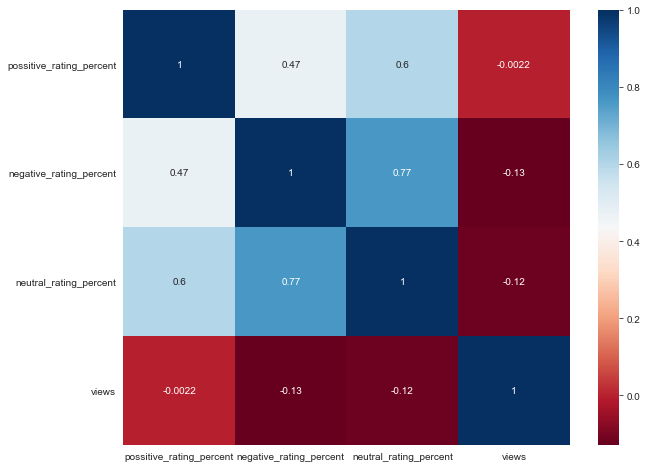

In [142]:
ratings = ['possitive_rating_percent','negative_rating_percent','neutral_rating_percent', 'views']

plt.figure(figsize=(10,8))
sns.heatmap(data[ratings].corr(), annot=True, cmap='RdBu');

Хммм.. оказва се, че и трите вида рейтинги имат отрицателна корелация спрямо гледанията. Неутралните и негативните гледания имат доста висока корелация, тоест може би преценката ми, че **OK** е неутрален рейтинг е грешна и трябва да слея колоните.

In [147]:
data['negative_rating_percent'] = data['negative_rating_percent'] + data['neutral_rating_percent']
data = data.drop('neutral_rating_percent', axis = 1)

## Baseline model

Нека видим какъв модел бихме могли да направим на оснoвата на числовите ни данни до момента и дали горе долу можем да го използваме за отправна точка. Така наречения *baseline* модел.

In [177]:
data.describe()

,comments,duration,languages,views,single_speaker,possitive_rating_percent,negative_rating_percent,film_year,published_year
count,2544.000000,2544.000000,2544.000000,2.544000e+03,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000
mean,191.706761,827.316431,27.319969,1.699779e+06,0.977201,37.378588,8.592339,2011.463443,2012.090409
std,282.613719,373.828955,9.563529,2.501043e+06,0.149291,43.086269,13.803662,3.731375,3.013876
min,2.000000,135.000000,0.000000,5.044300e+04,0.000000,0.000000,0.000000,1972.000000,2006.000000
25%,63.000000,578.750000,23.000000,7.565802e+05,1.000000,0.000000,0.000000,2009.000000,2010.000000
50%,118.000000,848.500000,28.000000,1.123870e+06,1.000000,0.000000,0.000000,2012.000000,2012.000000
75%,222.000000,1047.000000,33.000000,1.702149e+06,1.000000,87.092594,13.228207,2014.000000,2015.000000
max,6404.000000,5256.000000,72.000000,4.722711e+07,1.000000,98.995892,84.493252,2017.000000,2017.000000


In [178]:
from sklearn.model_selection import train_test_split

train_no_views = data.drop(labels=['views'], axis=1)
train_views = data['views']

x_train, x_test, y_train, y_test = train_test_split(train_no_views, 
                                                    train_views, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [179]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['comments', 'duration', 'languages', 'single_speaker',
       'possitive_rating_percent', 'negative_rating_percent', 'film_year',
       'published_year'],
      dtype='object')


In [180]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Колко ли добър резултат имаме? Нека проверим.

In [181]:
print(regressor.score(x_train[numeric_column_names], y_train))
print(regressor.score(x_test[numeric_column_names], y_test))

0.37485325515098056
0.3037457699083179


Ами бих определила този резултат като доста мизерен. Честно казано очаквах малко по-голямо число. Нека приложим трансформацията с логаритъм и видим дали би имало подобрение.

In [182]:
all_data_lr = LinearRegression().fit(x_train[numeric_column_names], pd.np.log10(y_train))
print(all_data_lr.score(x_train[numeric_column_names], pd.np.log10(y_train)))
print(all_data_lr.score(x_test[numeric_column_names], pd.np.log10(y_test)))

0.5190464575869079
0.47362225064254293


Добре, все още доста нисък скор, но има подобрение. Нека видим на кои колони моделът ни придава най-голяма важност.

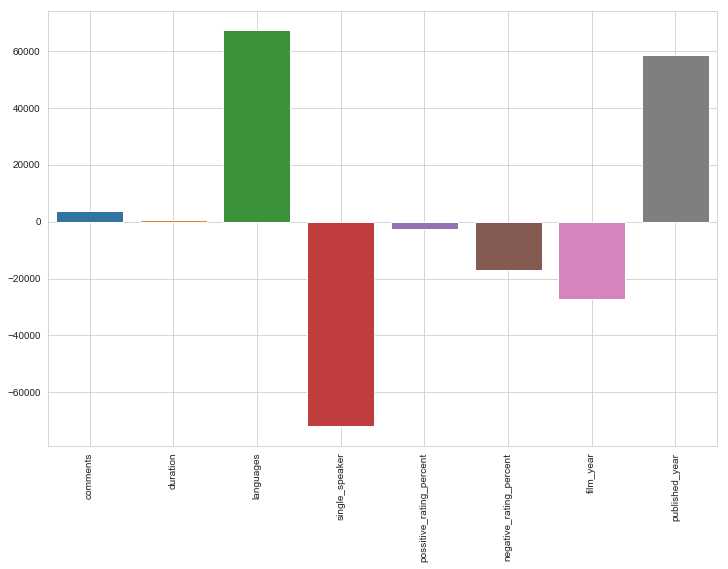

In [183]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=numeric_column_names, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

Моделът ни за сега, придава най-голяма важност на колоните *single_speaker*, *languages* и *published_year*, противно на моите очаквания коментарите да имат най-високо влияние. Интересното тук е че дори и колоната *positive_ratings_percent* има негативна стойност.


## Comments

Логично е клиповете с много гледания да имат много коментари, както и обратното. Нека видим връзката между 2те колони.

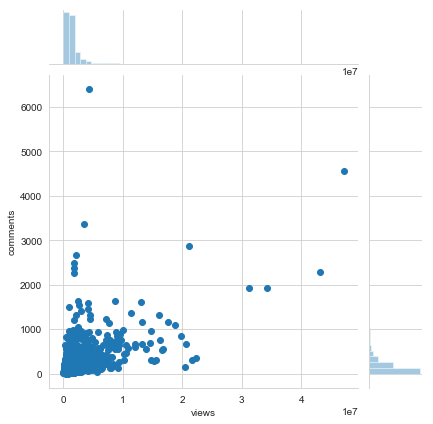

In [162]:
sns.jointplot(x='views', y='comments', data=data);

In [163]:
data[['views', 'comments']].corr()

,views,comments
views,1.000000,0.530897
comments,0.530897,1.000000


Очевидно гледанията и коментарите имат корелация, но какво още можем да извлечем от тази колона? Можем да видим до колко клиповете са станали обект на *дискусия*. Ще направим нова колона, която ще съдържа съотношението между броя коментари и гледания.

In [189]:
data['discussion_rate'] = data['comments']/data['views']

## Втори опит

Нека пробваме пак.

In [191]:
train_no_views = data.drop(labels=['views'], axis=1)
train_views = data['views']

x_train, x_test, y_train, y_test = train_test_split(train_no_views, train_views, test_size=0.3, random_state=4330)

numeric_column_names = x_train.describe().columns

new_data_lr = LinearRegression().fit(x_train[numeric_column_names], pd.np.log10(y_train))
print(new_data_lr.score(x_train[numeric_column_names], pd.np.log10(y_train)))
print(new_data_lr.score(x_test[numeric_column_names], pd.np.log10(y_test)))

0.6456933372310483
0.6357664076265956


Вдигнахме резултата и малко намалихме overfit-ването.